# Perceptron Trick(Basic)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for making a simple classifiacation datset
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,
                        random_state=41,hypercube=False,class_sep=10)

In [2]:
y.shape

(100,)

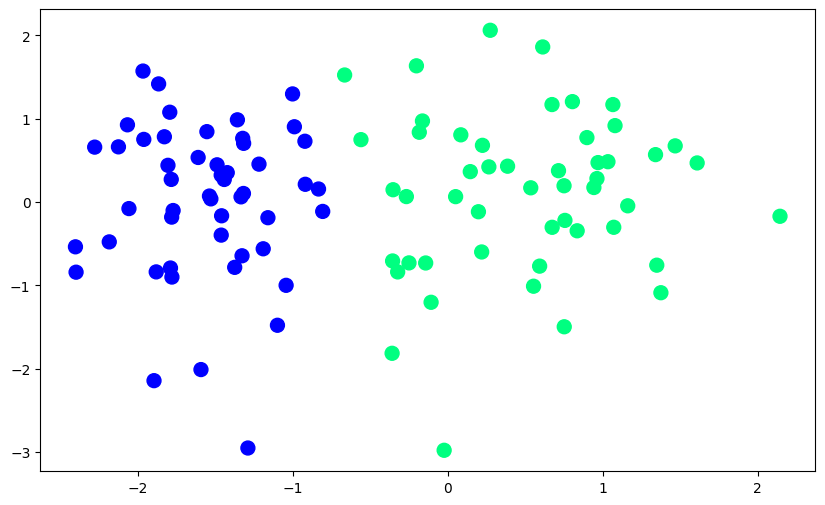

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
# Perceptron Function for calculating Weights
def Perceptron(X,y):
    X=np.insert(X,0,1,axis=1) # inserting 1 at 0th column for each X_i
    weights=np.ones(X.shape[1]) # initializing weights as [1,1,1]
    lr=0.1 # initializing learning rate
    
    for i in range(1000):
        j=np.random.randint(100) # first choose a random row
        y_hat=step(np.dot(X[j],weights)) # calculating Y_hat using step function
        weights=weights+lr*(y[j]-y_hat)*X[j] # updating weights W_new=W_old+lr*(Y_i - Y_hat)*X_i
        
    return weights[0],weights[1:]

In [5]:
# step function
def step(z):
    return 1 if z>=0 else 0

In [6]:
intercept_,coef_=Perceptron(X,y) # model training

In [7]:
print("Intercept is-->",intercept_)
print("Coeffecients-->",coef_)

Intercept is--> 0.9
Coeffecients--> [1.35439382 0.17361601]


In [8]:
# calculating m and b (m=-(A/B) , b=-(C/B))
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [9]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

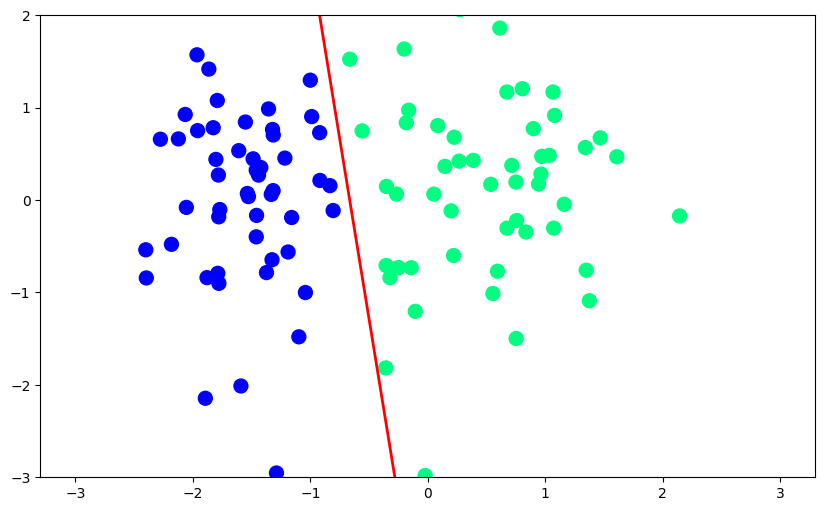

In [10]:
plt.figure(figsize=[10,6])
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)